# Using large data sets to improve travel distance estimations

*MIT Megacity Logistics Lab*(c)

- André Snoeck <asnoeck@mit.edu>
+ Daniel Merchan <dmerchan@mit.edu>

Under supervision of
- David Wihl <davidwihl@gmail.com>

**AC209a Data Science **
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>

In [3]:
from IPython.display import Image

## Why do we need to improve travel distance estimations? 

Current road navigation technologies make it very easy for us to find the shortest of fastest path between two points. Platforms such as Google Maps or Waze are becoming more and more ubiquitous as both individual users and companies leverage these tools. In Logistics, finding the best shortest path between to points is an **execution-level** decision which we face on a daily or even hourly basis. 

However, in Logistics applications, we are also interested in strategic, **design-level** decisions. For instance, an online retailer expanding to new markets will need to specify the number and locations of its facilities to serve a given city. The company projects a certain level of demand over the next season but does not know in advance the exact timing and location of customer orders. 

Thus, at the design level, the retailer can't use tools like Google Maps the same way these are used at the **execution** level. This when distance approximation methods come into play. 

Transportation design and planning methods frequently rely on analytical approximations to quantify distances traveled. For the most general case, the euclidean (a.k.a. as-the-crow-flies) distance metric is used to estimate point to point trips. This approach is appropriate, for instance, for cases involving national and regional transportation networks. For transportation planning within urban areas, the rectilinear (a.k.a. Manhattan) distance metric has generally used.

However, distances approximations using the rectilinear metric fail to capture features of the road network that impact trips within cities such as one-way streets and geographic obstacles. Let's consider an example in the city of São Paulo:

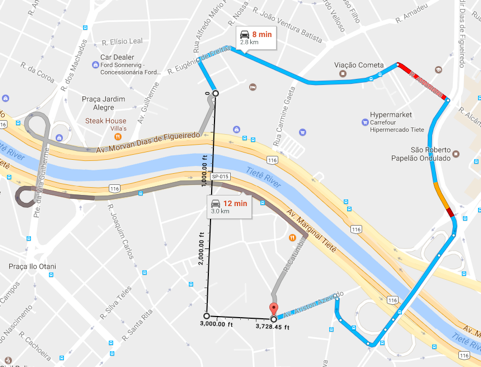

In [4]:
Image(filename='Motivation.png')

We observe that if estimate the travel distance between these two points, the euclidean metric will estimate 0.9 kilometers and rectilinear metric 1.15 kilometers. However, the real distance is close to 3 kilometers.

## Circuity Factors

%%html

The circuity factor is a multiplier to euclidean to improve the distance approximation by capturing the real features of the road network. Somehow, this is a metric of driving complexity in the area: the higher the circuity factor, the more difficult it is to navigate in that zone. 

Circuity factors have been explored and obtained for applications in regional and national sections, but these have not yet been explored at the city level. Here we present the results of our study which seek to estimate the circuity factor a the district level and explore the factors leading to different circuity factor values. For further details: Further details about these methods can be found in <a href="Milestone_2.html" target="_self">Milestone 2</a> 

We estimated the circuity factor for two metropolitan areas: São Paulo (Brazil) and San Francisco - San Jose (USA). To do so, we first segment the city in homogeneous areas of one square kilometer each . We call each of this areas a 'pixel'. Then, within each pixel, we simulated a large number of trips using the Google Maps to obtain the real travel distance. Then, with the coordinates of the origin and destination of each individual trip, the euclidean distance can be obtained. Finally, the ratio between the real distance and the euclidean distance gives us the circuity factor of a trip. We report these results at the pixel level. In total, nearly 600,000 trips were analyzed for both cities.

For São Paulo, the average circuity factor per pixel ranges from 1.1 to approximately five.

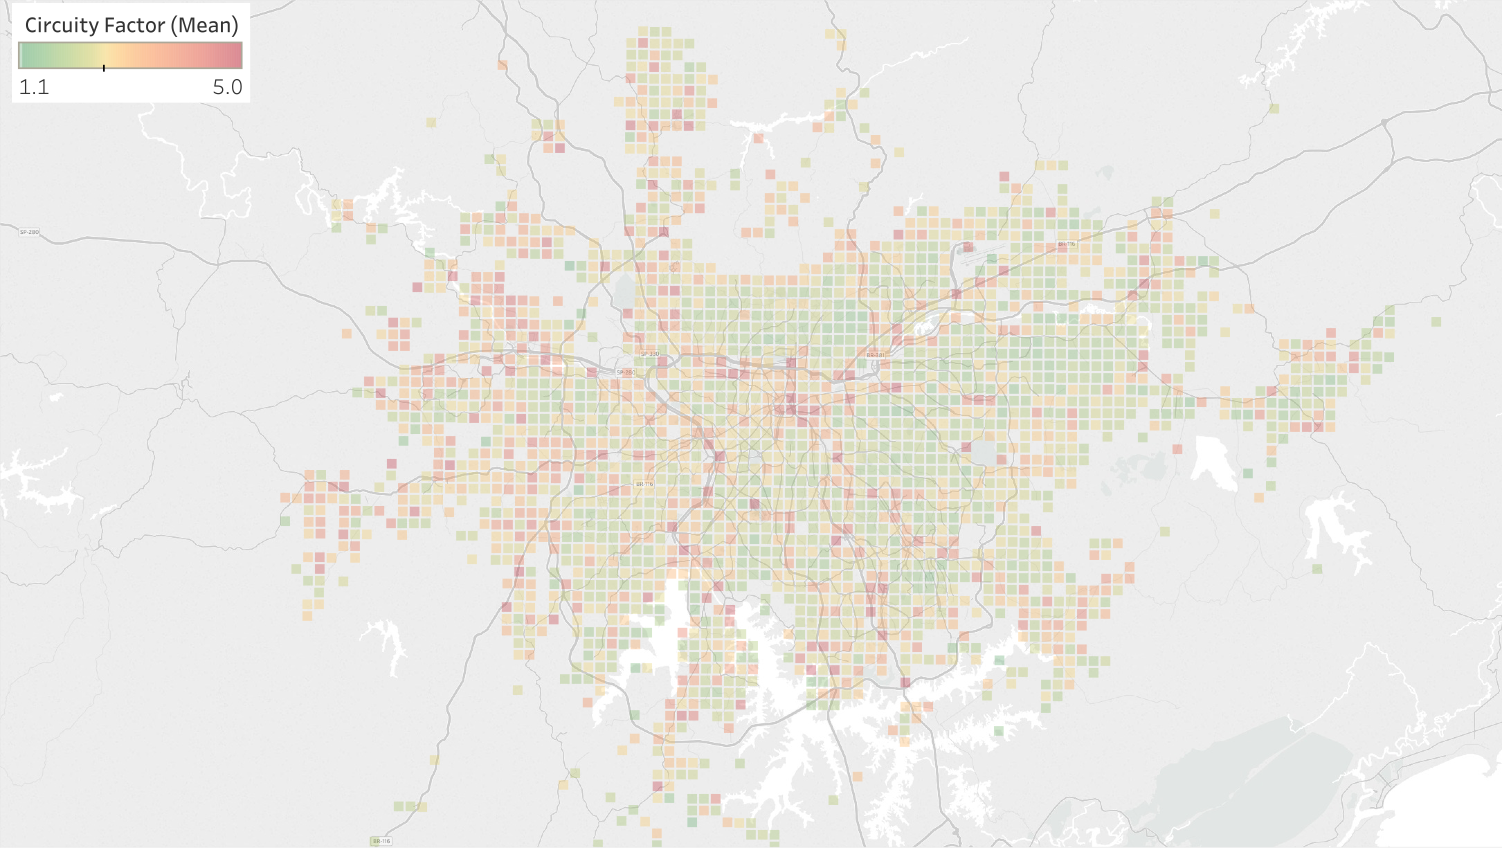

In [5]:
Image(filename='SaoPaulo_CFMap.png')

A similar range is observed for San Francisco:

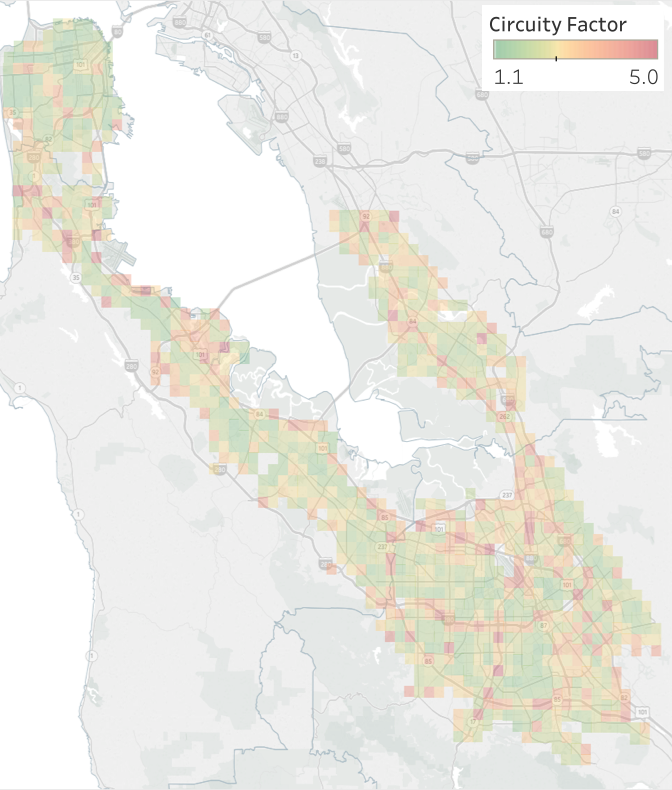

In [6]:
Image(filename='SFO_CFMap.png')

Indeed, the probability distribution of circuity factors for both cities is surprisingly similar, in spite the fact that these two are relatively different cities in terms of size, infrastructure and economic development.

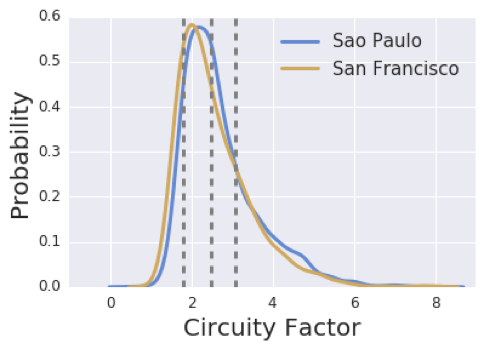

In [5]:
Image(filename='Histogram.png') 

To enhance comparability across the two case studies, we classify each pixel from low to very high circuity factor value:

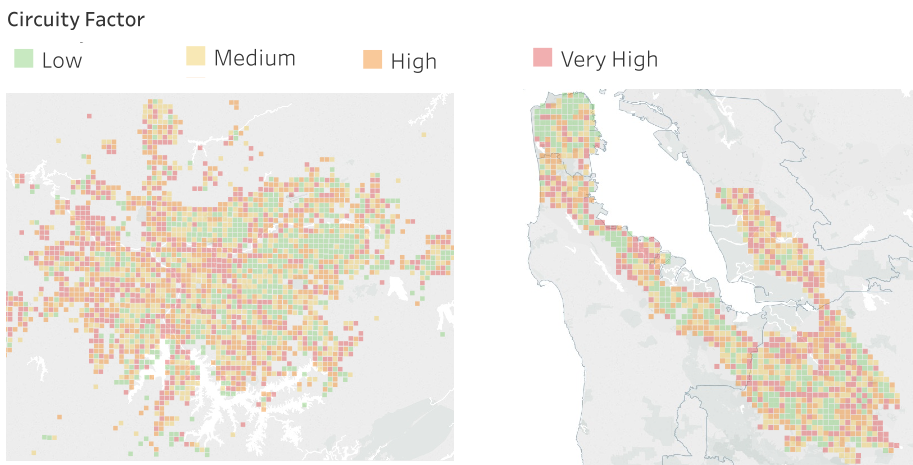

In [6]:
Image(filename='All_CFMap_Categories.png') 

In both cases, we observe very high circuity factor values in zones where a highway passes through. In the case of São Paulo, we also observe high values in the city center, mostly due to one-way streets. In San Francisco, on the other hand, the circuity factor in downtown tends to be lower due to the high road network connectivity (number of road intersections). The scatter plot below shows how the circuity factor in San Francisco decreases when we the number of nodes or intersections in the road network increases.

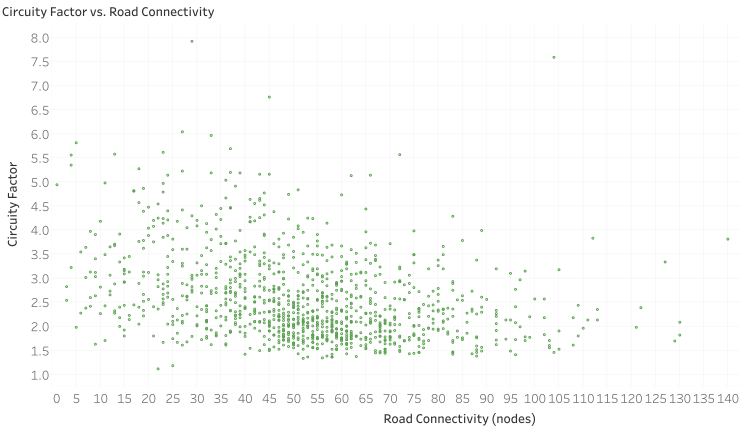

In [9]:
Image(filename='RoadConnectivity.png') 

We also observe that the fraction of one-way streets distance increases the circuity factor, but the relationship is less evident:

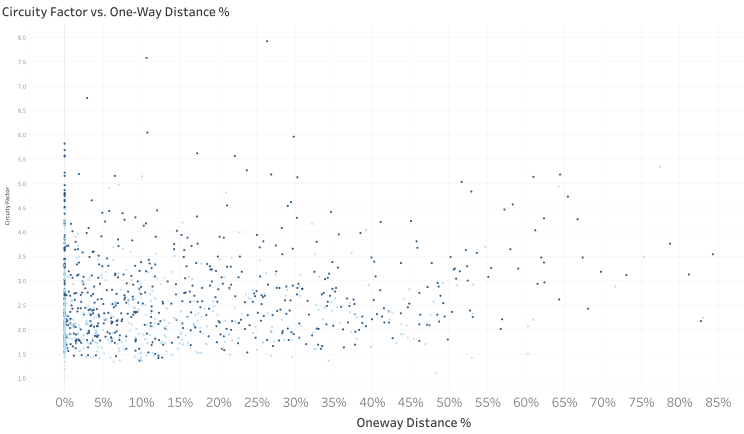

In [10]:
Image(filename='OneWay.png') 

Clearly, different features and their combinations impact the circuity factor differently. We further explore these impacts using data science methods. 

## Which features of the road network affect circuity factors the most?

As previously described, circuity factors signal the complexity of driving in an urban area. Consequently, exploring the road network features that affect circuity factors the most should provide insights potential solutions to overcome the challenges imposed by these road features. For instance, if we can prove that one-way streets significantly increase the circuity for delivery trucks in a certain area, a potential policy response could imply increasing the use of alternative vehicles that can more flexibly navigate in these zones, such as bicycles. 

Consequently, we capture key features of the road network in a set of variables that we then use to build prediction and classification models having the pixel-level circuity factor as the response. OpenStreetMaps was used as the main data source for road network information. We also included population density data in our analysis. Further details about the variables and data sources used can be found in <a href="Milestone_3.html" target="_self">Milestone 3</a> 

The data sources used as well as the models tested are summarized in the figure below:

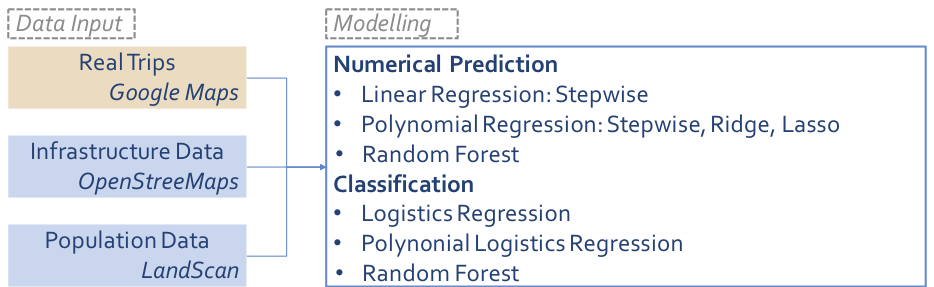

In [15]:
Image(filename='Methodology.png') 

The best model performance was obtained with a classification Random Forest:

#### San Francisco
+ Accuracy Train:   0.76 
- Accuracy Test :    0.51

#### São Paulo
+ Accuracy Train:   0.54 
- Accuracy Test:    0.47



A detailed review of the modeling approach as well as the performance of each model can be found on the in <a href="Model_Results.html" target="_self"> Model Results</a> page.

### Findings

The results of the Random Forest classification model indicate the following ranking of the predictors:

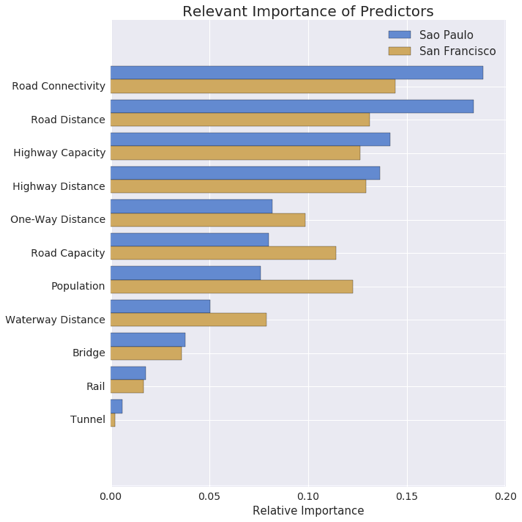

In [16]:
Image(filename='Results.png') 

The relative importance of predictors shows a similar pattern for Sao Paulo and San Francisco, indicating that several infrastructural attributes of the road network are more important than others. Analyzing the predictors in a bit more depth, we see that road connectivity (i.e. the number of intersections in one pixel) is the most relevant predictor in both case studies. We also see that predictors related to highway distance and capacity and road distance and capacity are important predictors (note that the difference between distance and capacity is that capacity accounts for the number of lanes per road). Intuitively, we would expect that an increased presence of highways increases the circuity factor, while increase the road distance decreases the circuity factor. 

We can also see that the one-way distance, measuring the prevalence of one-way roads in a pixel, is not as important as one intuitively might expect. One reason for this lower importance might be that one-way streets are actually quite rare. They are relatively common in downtown areas, but that is generally just a small subset of the pixels compared to the suburbs with limited one-way streets. 

Lastly, we see that obstacles such as waterways and railroads, or infrastructural components that help overcome obstacles, such as bridges and tunnels, are relatively unimportant compared to the road connectivity, road distance and capacity, and highway prevalence. 

In addition to understanding the relative importance, we would like to know the direction of the effect of each of these predictors. In other words, we are interested in exploring whether a given predictors increases or decreases the circuity factor. To do so, we analyze the beta coefficients of the linear regression model.  

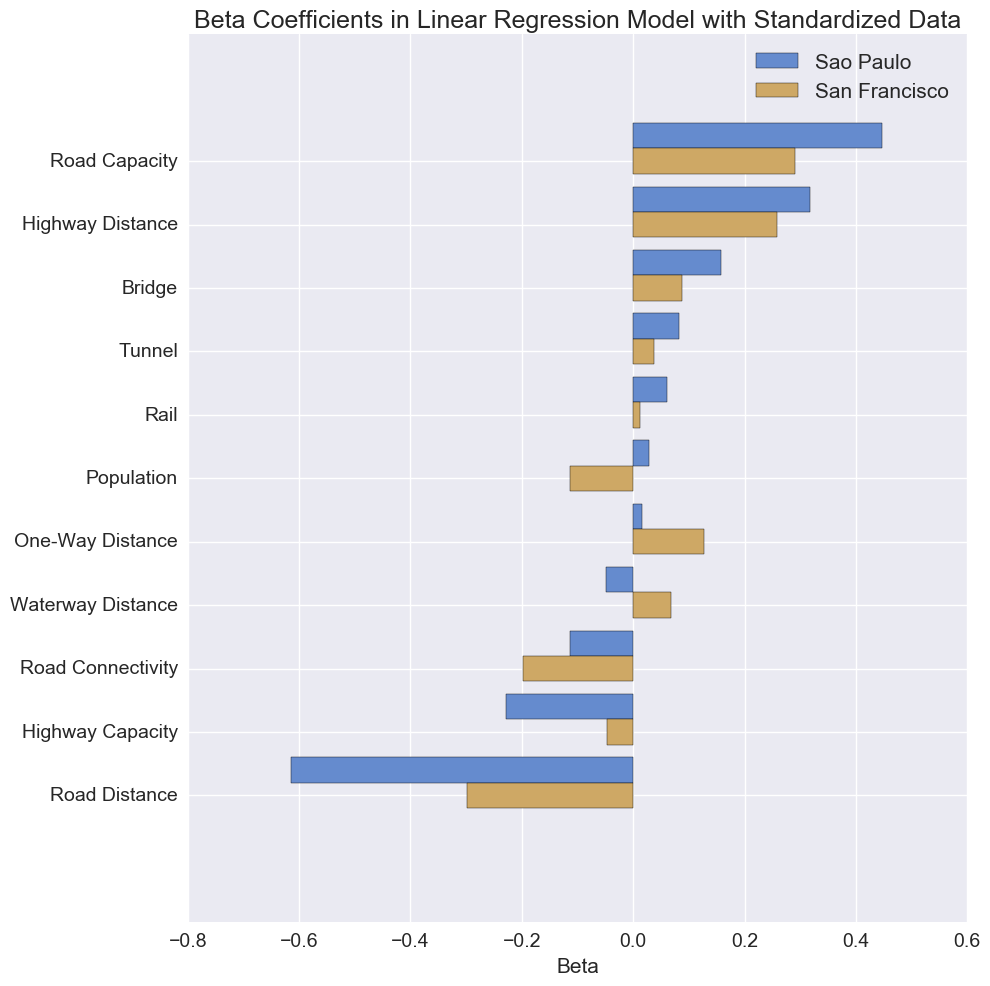

In [17]:
Image(filename='Results_II.png') 

The beta coefficients of the linear regression also give us an indication of the magnitude of the predictors. Furthermore, it shows if the predictor has a positive or negative effect on circuity factor. In general, we see that the magnitude of the betas matches the relative importance of the random forests. However, it is highly likely that the correlation between *highway capacity* and *highway distance* and *road capacity* and *road distance* influence the magnitude and sign of the predictor. It is counterintuitive that road capacity has a positive effect on circuity factor, while road distance has a negative effect (and the opposite for highways). 

Based on the graph and the above described insight, we can draw the following conclusions:
* Road connectivity, according to our random forest models the predictor with the highest relative importance, has a negative influence on circuity factor. This makes intuitive sense. Having more intersections in a area makes shorter connections possible. 
* Population has a small effect, but the sign is not consistent between Sao Paulo and San Fransisco. A potential explanation for this could be that in the Bay Area, the areas with highways tend to be the less populated areas, while in Sao Paulo the highways cross the highly dense urban areas. So in San Fransisco, having a high population actually means more smaller roads, leading to a negative effect on circuity factor. 
* To get more insightful betas for highway/road capacity and distance, we should run the model with one variable of each. 


## Key Take-Aways

The key take-aways of this research are the following
+ Circuity factors can significantly improve the accuracy of distance approximation methods
- Similar distribution of circuity factors observed for two different metropolitan areas 
- Circuity factors mostly depend upon road connectivity, road distance and the presence of highways